In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pyreadr
import requests
import seaborn as sns

from plotnine import aes, ggplot, labs, stat_function
from scipy import integrate, stats

In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
RANDOM_SEED = 1301
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [5]:
def plot_gamma(shape, rate):
    gamma = np.random.gamma(shape, rate, size=10000)
    sns.distplot(gamma)

/Users/tomkealy/opt/anaconda3/envs/bayes_rules/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


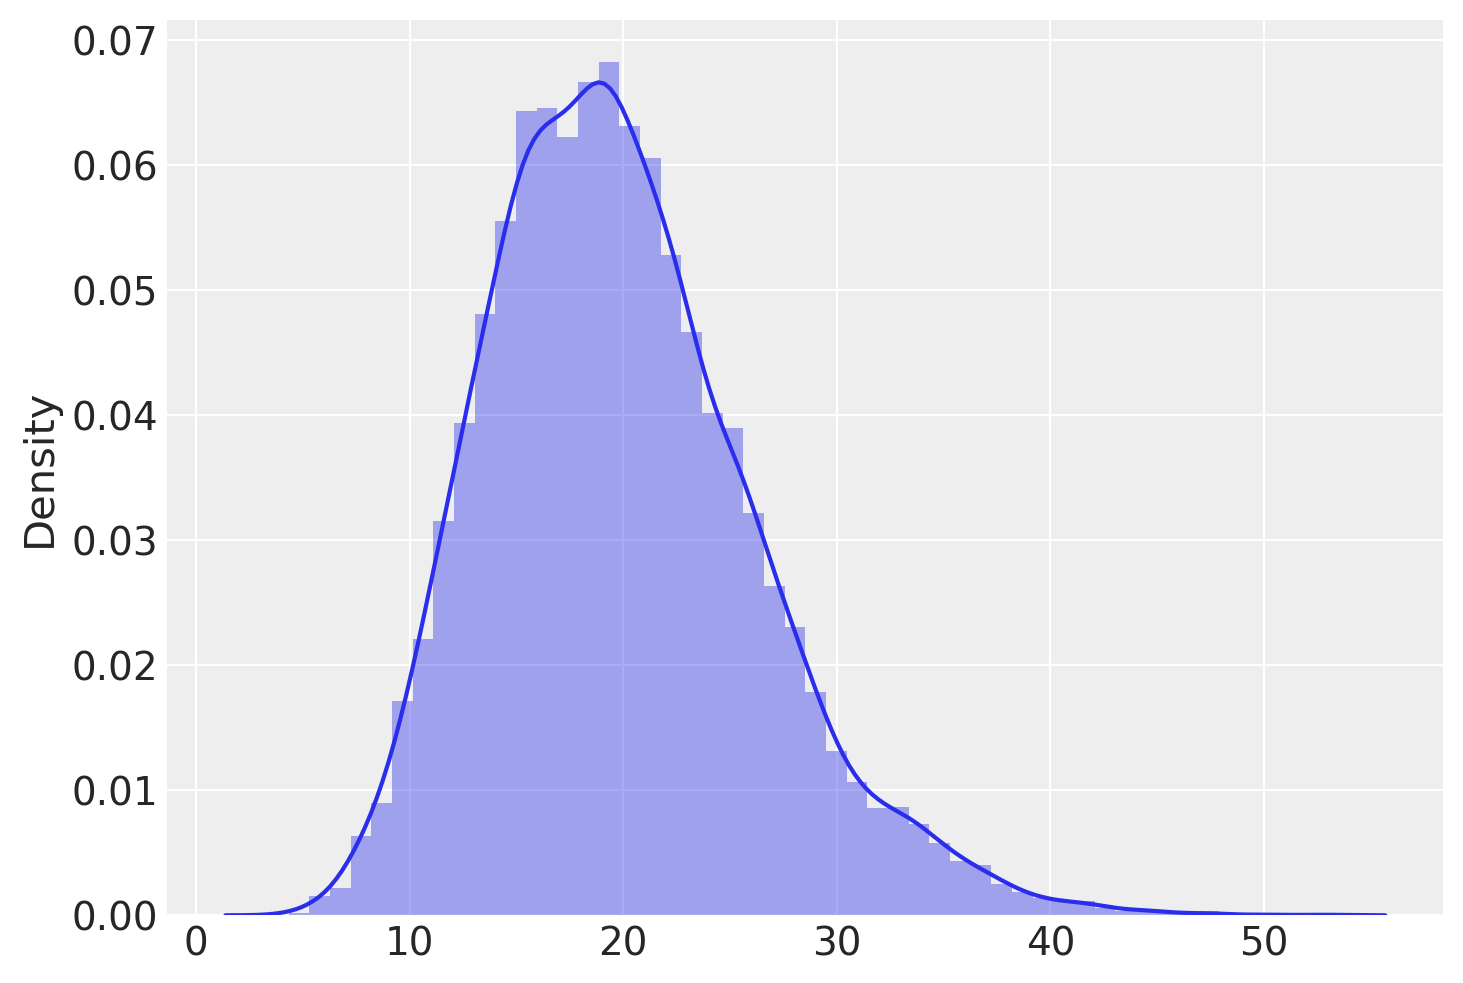

In [6]:
plot_gamma(shape=10, rate=2)

In [ ]:
def plot_poisson_likelihood(y, lambda_upper_bound=10):
    """
    @param y vector of observed Poisson counts
    @param lambda_upper_bound upper bound for lambda values to display on x-axis
    """

    lambdas_ = np.arange(0, lambda_upper_bound, 0.1)

    ht = exp(-1 * length(y) * lambdas_) * lambdas_ ^ (y.sum()) / prod(factorial(y))

In [35]:
y = np.array([6, 2, 2, 1])

likelihood = stats.poisson.pmf(y, y.mean())

likelihood

array([0.038402  , 0.24172723, 0.24172723, 0.17580162])

In [ ]:
plot_poisson_likelihood(y=np.array([6, 2, 2, 1]), lambda_upper_bound=10)

In [ ]:
plot_gamma_poisson <- function (shape, rate,
                                sum_y = NULL,
                                n = NULL,
                                prior = TRUE,
                                likelihood = TRUE,
                                posterior = TRUE){
  
  if (is.null(sum_y) | is.null(n))
    warning("To visualize the posterior,
            specify information about the data: sum_y and n")
  
 
  
  x_min <- min(qgamma(1e-05, shape, rate),
               qgamma(1e-05,
                      shape + sum_y,
                      rate + n),
               qgamma(1e-05, sum_y + 1, n))
  x_max <- max(qgamma(0.99999, shape, rate),
               qgamma(0.99999, shape + sum_y,
                      rate + n),
               qgamma(0.99999, sum_y + 1, n))
  g <- ggplot(data = data.frame(x = c(x_min, x_max)), aes(x)) +
    labs(x = expression(lambda),
         y = "density") +
    scale_fill_manual("",
                      values = c(prior = "#f0e442",
                                 `(scaled) likelihood` = "#0071b2",
                                 posterior = "#009e74"),
                      breaks = c("prior",
                                 "(scaled) likelihood",
                                 "posterior"))

  if (prior == TRUE) {
    g <- g + stat_function(fun = dgamma,
                           args = list(shape = shape,
                                       rate = rate)) +
      stat_function(fun = dgamma,
                    args = list(shape = shape,
                                rate = rate),
                    geom = "area",
                    alpha = 0.5,
                    aes(fill = "prior"))
  }

  if (!is.null(sum_y) & !is.null(n)) {
    shape_post <- shape + sum_y
    rate_post <- rate + n
    like_scaled <- function(x) {
      dgamma(x, shape = sum_y + 1, rate = n)
    }
  }
  if (!is.null(sum_y) & !is.null(n) & (likelihood != FALSE)) {
    g <- g +
      stat_function(fun = like_scaled) +
      stat_function(fun = like_scaled,
                    geom = "area",
                    alpha = 0.5,
                    aes(fill = "(scaled) likelihood"))
  }
  if (!is.null(sum_y) & !is.null(n) & posterior == TRUE) {
    g <- g +
      stat_function(fun = dgamma,
                    args = list(shape = shape_post,
                                rate = rate_post)) +
      stat_function(fun = dgamma,
                    args = list(shape = shape_post,
                                rate = rate_post),
                    geom = "area",
                    alpha = 0.5,
                    aes(fill = "posterior"))
  }
  g
}

In [ ]:
plot_gamma_poisson(shape=10, rate=2, sum_y=11, n=4)

In [24]:
from scipy.stats import gamma

shape = 10
rate = 2

x_min, x_max= gamma.ppf([1e-25, 0.99999], shape, scale=rate)

ggplot([x_min, x_max],
         aes(x)) +
    stat_function(fun = dgamma,
                  n = 101,
                  args = list(shape = shape,
                              rate = rate)) +
    labs(x = expression(lambda),
         y = expression(paste("f(",lambda,")"))) 

In [27]:
from plotnine import aes, ggplot, labs, stat_function

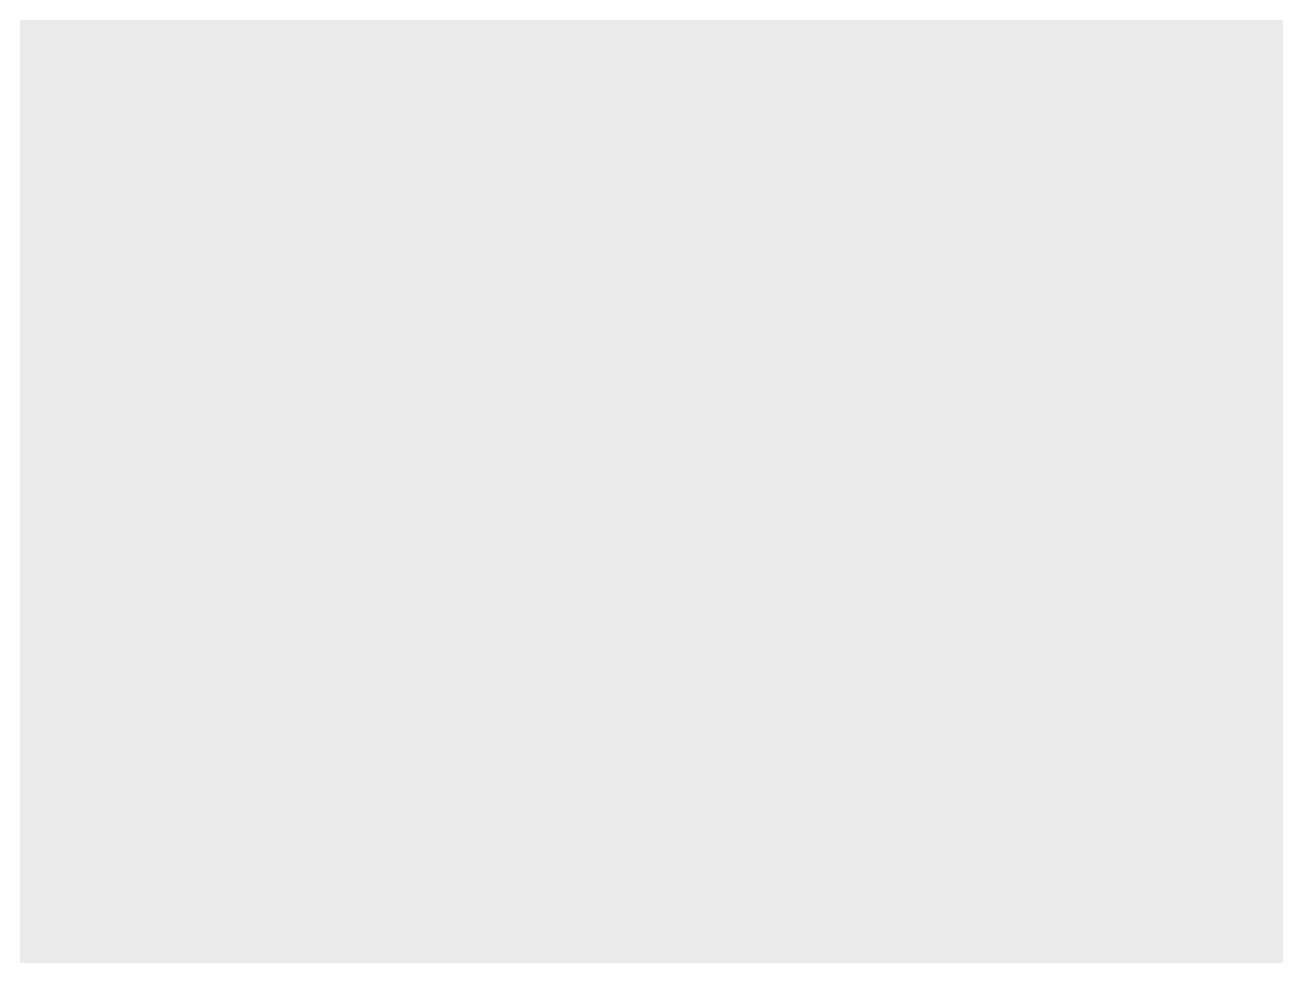

<ggplot: (380319513)>

In [30]:
ggplot(data=pd.DataFrame() + aes(x))